In [1]:
f=open("C:/Users/infec/Desktop/Python Machinelearning/저수용량.txt", "r", encoding="UTF-8")
f.close()

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
save=pd.read_excel("C:/Users/infec/Desktop/수자원공사 공모전/저수량엑셀.xlsx")

In [5]:

save.rename(columns={"Unnamed: 0": "댐명"}, inplace=True)
save

,댐명,저수용량,홍수조절용량,용수공급능력
0,계,12923,5267.0,12032
1,소양강,2900,500.0,1213
2,충주,2750,616.0,3380
3,횡성,87,10.0,120
4,안동,1248,110.0,926
5,임하,595,80.0,592
6,성덕,28,4.0,21
7,영주,181,75.0,203
8,군위,49,3.0,38
9,김천부항,54,12.0,36


In [6]:
save.corr(method="pearson")

,저수용량,홍수조절용량,용수공급능력
저수용량,1.000000,0.984518,0.988583
홍수조절용량,0.984518,1.000000,0.983533
용수공급능력,0.988583,0.983533,1.000000


In [7]:
damsize=pd.read_csv("C:/Users/infec/Desktop/Python Machinelearning/댐별 제원정보.csv", encoding="cp949")
damsize.head()

,댐코드,댐명,높이,길이,유역면적,계획 홍수위,상시 만수위,총 저수량
0,1001210,광동댐,39.5,292,125,675.30,672.0,13.13
1,1003110,충주댐,97.5,447,6648,145.00,141.0,"2,750.00"
2,1006110,횡성댐,48.5,205,209,180.00,180.0,86.9
3,1012110,소양강댐,123.0,530,2703,198.00,193.5,"2,900.00"
4,1302210,달방댐,53.5,326,29,114.25,112.0,8.75


In [8]:
smalldam=damsize.loc[:, ["댐명", "유역면적"]]
smalldam

,댐명,유역면적
0,광동댐,125
1,충주댐,6648
2,횡성댐,209
3,소양강댐,2703
4,달방댐,29
5,안동댐,1584
6,임하댐,1361
7,성덕댐,41
8,영주댐,500
9,군위댐,88


In [45]:
damsize.sort_values(by=["총 저수량"], ascending=False)

,댐코드,댐명,높이,길이,유역면적,계획 홍수위,상시 만수위,총 저수량
2,1006110,횡성댐,48.5,205,209,180.00,180.0,86.9
25,3001110,용담댐,70.0,498,930,265.50,263.5,815
4,1302210,달방댐,53.5,326,29,114.25,112.0,8.75
13,2015110,합천댐,96.0,472,925,179.00,176.0,790
15,2021110,밀양댐,89.0,535,95,210.20,207.2,73.6
6,2002110,임하댐,73.0,515,1361,164.70,163.0,595
10,2010101,김천부항댐,57.4,440,82,198.60,195.0,54.3
28,3303110,부안댐,50.0,282,59,43.80,41.2,50.3
23,2503210,연초댐,24.5,120,12,49.60,48.0,5.22
9,2008101,군위댐,45.0,390,88,205.10,204.0,48.7


In [9]:
smalldam.set_index("댐명", inplace=True)
smalldam

,유역면적
댐명,
광동댐,125
충주댐,6648
횡성댐,209
소양강댐,2703
달방댐,29
안동댐,1584
임하댐,1361
성덕댐,41
영주댐,500


In [10]:
save["댐명"]=save["댐명"]+"댐"
save

,댐명,저수용량,홍수조절용량,용수공급능력
0,계댐,12923,5267.0,12032
1,소양강댐,2900,500.0,1213
2,충주댐,2750,616.0,3380
3,횡성댐,87,10.0,120
4,안동댐,1248,110.0,926
5,임하댐,595,80.0,592
6,성덕댐,28,4.0,21
7,영주댐,181,75.0,203
8,군위댐,49,3.0,38
9,김천부항댐,54,12.0,36


In [11]:
save.set_index("댐명", inplace=True)

In [12]:
save

,저수용량,홍수조절용량,용수공급능력
댐명,,,
계댐,12923,5267.0,12032
소양강댐,2900,500.0,1213
충주댐,2750,616.0,3380
횡성댐,87,10.0,120
안동댐,1248,110.0,926
임하댐,595,80.0,592
성덕댐,28,4.0,21
영주댐,181,75.0,203
군위댐,49,3.0,38


In [13]:
concated=pd.concat([smalldam, save], join="inner", axis=1)
concated

,유역면적,저수용량,홍수조절용량,용수공급능력
댐명,,,,
충주댐,6648,2750,616.0,3380
횡성댐,209,87,10.0,120
소양강댐,2703,2900,500.0,1213
안동댐,1584,1248,110.0,926
임하댐,1361,595,80.0,592
성덕댐,41,28,4.0,21
영주댐,500,181,75.0,203
군위댐,88,49,3.0,38
김천부항댐,82,54,12.0,36


In [14]:
concated2=pd.concat([save, smalldam], join="inner", axis=1)


In [15]:
concated["savingpower"]=concated.loc[:, "홍수조절용량"]*100/concated.loc[:, "유역면적"]
concated["savingpower2"]=concated.loc[:, "홍수조절용량"]*concated.loc[:,"저수용량"]/concated.loc[:, "유역면적"]

In [16]:
spsort=concated["savingpower"].sort_values()
spsort2=concated["savingpower2"].sort_values()

In [17]:
dummy={"저수용량": 707, "홍수조절용량": 80.0, "용수공급능력": 489, "유역면적":1010}

save.loc["주암댐", :]

저수용량      707.0
홍수조절용량     80.0
용수공급능력    489.0
Name: 주암댐, dtype: float64

In [18]:
spsort["주암댐"]=80*100/1010
spsort2["주암댐"]=707*80/1010



In [19]:
realscore1=spsort.sort_values()
realscore2=spsort2.sort_values()

In [20]:
realscore2

댐명
군위댐        1.670455
보현산댐       2.000000
성덕댐        2.731707
횡성댐        4.162679
밀양댐        4.673684
보령댐        7.134146
부안댐        7.627119
김천부항댐      7.902439
장흥댐        7.917098
섬진강댐      18.505636
영주댐       27.150000
임하댐       34.974284
남강댐       36.512035
주암댐       56.000000
합천댐       68.324324
안동댐       86.666667
대청댐      116.260924
용담댐      120.059140
충주댐      254.813478
소양강댐     536.440991
Name: savingpower2, dtype: float64

In [21]:
concated

,유역면적,저수용량,홍수조절용량,용수공급능력,savingpower,savingpower2
댐명,,,,,,
충주댐,6648,2750,616.0,3380,9.265945,254.813478
횡성댐,209,87,10.0,120,4.784689,4.162679
소양강댐,2703,2900,500.0,1213,18.497965,536.440991
안동댐,1584,1248,110.0,926,6.944444,86.666667
임하댐,1361,595,80.0,592,5.878031,34.974284
성덕댐,41,28,4.0,21,9.756098,2.731707
영주댐,500,181,75.0,203,15.000000,27.150000
군위댐,88,49,3.0,38,3.409091,1.670455
김천부항댐,82,54,12.0,36,14.634146,7.902439


In [22]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()


In [23]:
scoredf=pd.DataFrame([realscore1, realscore2])
scoredf=scoredf.T
scoredf.shape

(20, 2)

In [24]:
scoredf["scaled score"]=scale.fit_transform(scoredf[["savingpower"]])*100


In [25]:
scoredf

,savingpower,savingpower2,scaled score
댐명,,,
군위댐,3.409091,1.670455,0.000000
섬진강댐,3.971166,18.505636,3.725099
장흥댐,4.145078,7.917098,4.877679
횡성댐,4.784689,4.162679,9.116638
임하댐,5.878031,34.974284,16.362652
보령댐,6.097561,7.134146,17.817566
밀양댐,6.315789,4.673684,19.263853
안동댐,6.944444,86.666667,23.430201
대청댐,7.802747,116.260924,29.118512


In [26]:
dailysave=pd.read_excel("C:/Users/infec/Desktop/수자원공사 공모전/저수량(일별).xlsx", skiprows=3, header=None)
dailyinflux=pd.read_excel("C:/Users/infec/Desktop/수자원공사 공모전/유입량(일별).xlsx", skiprows=3, header=None)


In [27]:
col_list=["날짜", "누계", "소양강댐", "충주댐" , "횡성댐" ,"안동댐", "임하댐", "성덕댐", "영주댐", "군위댐", "김천부항댐", "보현산댐", "합천댐", "남강댐", "밀양댐", "용담댐", "대청댐", "섬진강댐", "주암댐", "주암조절지", "부안댐","보령댐", "장흥댐"]
len(col_list)

23

In [28]:
dailysave.columns=col_list
dailyinflux.columns=col_list
dailysave.set_index("날짜", inplace=True)
dailyinflux.set_index("날짜", inplace=True)


In [29]:
dailyinflux.drop(["누계"], axis=1, inplace=True)
dailysave.drop(["누계"], axis=1, inplace=True)

In [30]:
spi=dailysave.mean()/dailyinflux.mean()
spi=spi.sort_values()
spi

영주댐       3.844027
합천댐      12.441338
보령댐      13.155969
충주댐      15.499528
주암댐      15.549735
섬진강댐     16.541175
대청댐      17.271836
군위댐      18.575247
김천부항댐    19.739699
보현산댐     19.745044
주암조절지    20.721563
장흥댐      23.127981
임하댐      23.237813
밀양댐      26.056772
용담댐      26.147960
횡성댐      26.613074
남강댐      27.305876
부안댐      29.809332
성덕댐      32.075790
안동댐      39.339580
소양강댐     45.794193
dtype: float64

In [31]:
spidf=pd.DataFrame(spi, columns=["spi"])
spidf.loc["주암댐"]=spidf.loc["주암조절지"]*(134/1144)+spidf.loc["주암댐"]*(1010/1144)
#주암조절지는 주암댐이랑 가중평균 낼게요
spidf.drop("주암조절지", axis=0, inplace=True)
spidf

,spi
영주댐,3.844027
합천댐,12.441338
보령댐,13.155969
충주댐,15.499528
주암댐,16.155526
섬진강댐,16.541175
대청댐,17.271836
군위댐,18.575247
김천부항댐,19.739699
보현산댐,19.745044


In [32]:
multiple=pd.concat([scoredf, spidf],  join="inner", axis=1)
ascale=MinMaxScaler()
multiple["spi"]=ascale.fit_transform(multiple[["spi"]])*100
multiple

,savingpower,savingpower2,scaled score,spi
군위댐,3.409091,1.670455,0.000000,35.115999
섬진강댐,3.971166,18.505636,3.725099,30.267218
장흥댐,4.145078,7.917098,4.877679,45.968720
횡성댐,4.784689,4.162679,9.116638,54.276418
임하댐,5.878031,34.974284,16.362652,46.230537
보령댐,6.097561,7.134146,17.817566,22.197628
밀양댐,6.315789,4.673684,19.263853,52.950315
안동댐,6.944444,86.666667,23.430201,84.613619
대청댐,7.802747,116.260924,29.118512,32.008955
주암댐,7.920792,56.000000,29.900847,29.347916


In [33]:
#spi는 유입량 대비 얼마나 저수를 잘하는가?
#scaled score는 홍수조절을 얼마나 잘하는가?


In [47]:
Bigmulti=multiple.loc[["섬진강댐", "소양강댐", "충주댐", "대청댐", "안동댐", "남강댐"], :]

In [48]:
Bigmulti

,savingpower,savingpower2,scaled score,spi
섬진강댐,3.971166,18.505636,3.725099,30.267218
소양강댐,18.497965,536.440991,100.000000,100.000000
충주댐,9.265945,254.813478,38.815710,27.784160
대청댐,7.802747,116.260924,29.118512,32.008955
안동댐,6.944444,86.666667,23.430201,84.613619
남강댐,11.816193,36.512035,55.717222,55.927906


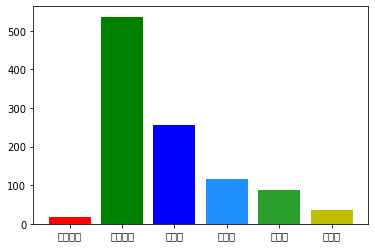

In [59]:
motherdir="C:/Users/infec/Desktop/수자원공사 공모전/"
plt.bar(Bigmulti.index, Bigmulti["savingpower2"], color=["r", "g", "b", "dodgerblue", "C2", "y"]  )
plt.savefig(motherdir+"savefig_1.png", dpi=200 )

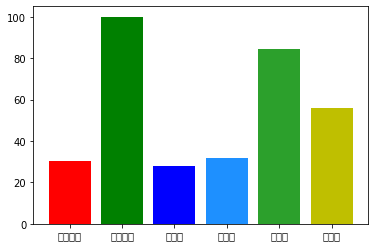

In [60]:
plt.bar(Bigmulti.index, Bigmulti["spi"], color=["r", "g", "b", "dodgerblue", "C2", "y"]  )
plt.savefig(motherdir+"savefig_spi.png", dpi=200 )